In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
#image dimensions
img_rows,img_cols = 32,32

In [3]:
#read csv dataset
data = pd.read_csv('dataset\\data.csv')

#get shape/dimension of dataset
data.shape

(92000, 1025)

In [4]:
# set target attribute
'character' in data.columns



True

In [5]:
# Split dataset into features (X) and target (y)-
X = data.drop('character', axis = 1)
y = data['character']

# Convert to numpy arrays-
X = X.values
y = y.values

In [6]:
X.shape, y.shape

((92000, 1024), (92000,))

In [7]:
# Check distribution of target attribute-
data['character'].value_counts()

character
character_01_ka              2000
character_35_tra             2000
character_26_yaw             2000
character_27_ra              2000
character_28_la              2000
character_29_waw             2000
character_30_motosaw         2000
character_31_petchiryakha    2000
character_32_patalosaw       2000
character_33_ha              2000
character_34_chhya           2000
character_36_gya             2000
character_02_kha             2000
digit_0                      2000
digit_1                      2000
digit_2                      2000
digit_3                      2000
digit_4                      2000
digit_5                      2000
digit_6                      2000
digit_7                      2000
digit_8                      2000
character_25_ma              2000
character_24_bha             2000
character_23_ba              2000
character_22_pha             2000
character_03_ga              2000
character_04_gha             2000
character_05_kna             2000
char

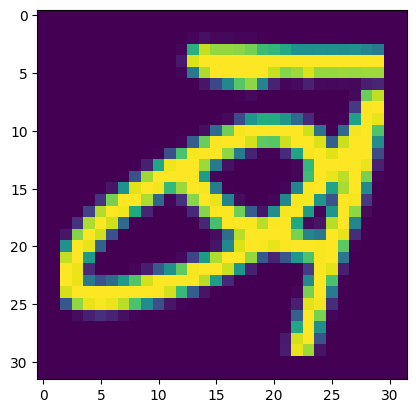

In [8]:
# Visualize a character from dataset-
plt.imshow(X[45000, :].reshape(32, 32))
plt.show()

In [9]:
# Reshape data for CNN-
X_exp = X.reshape(X.shape[0], 32, 32, 1)
X_exp.shape

(92000, 32, 32, 1)

In [10]:
# Label encode target attribute-

# Initialize a label encoder-
le = LabelEncoder()

# Train label encoder on target attribute-
y_transformed = le.fit_transform(y)


In [12]:
# number of classes for target attribute-
print("number of classes = {0}".format(len(set(y))))

number of classes = 46


In [13]:
# Split features and target attribute into training and testing sets-
X_train, X_test, y_train, y_test = train_test_split(X_exp, y_transformed, test_size=0.2, random_state=42)

In [14]:
# Convert into floating point
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the training and testing datasets
X_train /= 255.0
X_test /= 255.0

In [15]:
num_classes = len(set(y))
# convert class vectors/target to binary class matrices or one-hot encoded values-
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [16]:
print("\nShapes of training and testing sets are:")
print("X_train = {0}, y_train = {1}".format(X_train.shape, y_train.shape))
print("X_test = {0}, y_test = {1}\n".format(X_test.shape, y_test.shape))


Shapes of training and testing sets are:
X_train = (73600, 32, 32, 1), y_train = (73600, 46)
X_test = (18400, 32, 32, 1), y_test = (18400, 46)



In [17]:
# Create training and testing datasets-
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [18]:
train_dataset = ImageDataGenerator(rescale = 1/255, shear_range = .2, rotation_range = 10)

In [19]:
import pandas as pd

# 'character' contains your class labels
train_labels_series = pd.Series(data['character'])

# Get unique classes and their indices
unique_classes = train_labels_series.unique()
class_indices = {class_name: index for index, class_name in enumerate(unique_classes)}

# Print the class indices
print("Class Indices:", class_indices)

Class Indices: {'character_01_ka': 0, 'character_02_kha': 1, 'character_03_ga': 2, 'character_04_gha': 3, 'character_05_kna': 4, 'character_06_cha': 5, 'character_07_chha': 6, 'character_08_ja': 7, 'character_09_jha': 8, 'character_10_yna': 9, 'character_11_taamatar': 10, 'character_12_thaa': 11, 'character_13_daa': 12, 'character_14_dhaa': 13, 'character_15_adna': 14, 'character_16_tabala': 15, 'character_17_tha': 16, 'character_18_da': 17, 'character_19_dha': 18, 'character_20_na': 19, 'character_21_pa': 20, 'character_22_pha': 21, 'character_23_ba': 22, 'character_24_bha': 23, 'character_25_ma': 24, 'character_26_yaw': 25, 'character_27_ra': 26, 'character_28_la': 27, 'character_29_waw': 28, 'character_30_motosaw': 29, 'character_31_petchiryakha': 30, 'character_32_patalosaw': 31, 'character_33_ha': 32, 'character_34_chhya': 33, 'character_35_tra': 34, 'character_36_gya': 35, 'digit_0': 36, 'digit_1': 37, 'digit_2': 38, 'digit_3': 39, 'digit_4': 40, 'digit_5': 41, 'digit_6': 42, 'di

In [20]:
#creating cnn model

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(92, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(46, activation='softmax'))
    
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0012), loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [21]:
import pickle
history = model.fit(
    x = X_train, y = y_train,
    epochs=25, batch_size=64,
    verbose=1, shuffle=True,
    validation_data=(X_test, y_test)
)
# Save history to a file
with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

Epoch 1/25
1150/1150 [==============================] - 102s 87ms/step - loss: 0.8128 - accuracy: 0.7662 - val_loss: 0.2360 - val_accuracy: 0.9290
Epoch 2/25
1150/1150 [==============================] - 98s 85ms/step - loss: 0.2460 - accuracy: 0.9248 - val_loss: 0.1363 - val_accuracy: 0.9600
Epoch 3/25
1150/1150 [==============================] - 97s 85ms/step - loss: 0.1587 - accuracy: 0.9500 - val_loss: 0.1090 - val_accuracy: 0.9692
Epoch 4/25
1150/1150 [==============================] - 99s 86ms/step - loss: 0.1233 - accuracy: 0.9613 - val_loss: 0.0897 - val_accuracy: 0.9728
Epoch 5/25
1150/1150 [==============================] - 98s 85ms/step - loss: 0.0980 - accuracy: 0.9693 - val_loss: 0.0945 - val_accuracy: 0.9722
Epoch 6/25
1150/1150 [==============================] - 99s 86ms/step - loss: 0.0809 - accuracy: 0.9738 - val_loss: 0.0937 - val_accuracy: 0.9732
Epoch 7/25
1150/1150 [==============================] - 98s 85ms/step - loss: 0.0716 - accuracy: 0.9773 - val_loss: 0.0817 

In [22]:
# Evaluation of model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

575/575 [==============================] - 6s 10ms/step - loss: 0.0783 - accuracy: 0.9837
Test accuracy: 0.9836956262588501


In [23]:
model.save("25epochs.h5")
print("Model saved successfully.")

C:\Users\suyog\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

575/575 [==============================] - 5s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       380
           1       0.99      0.98      0.99       404
           2       0.99      0.99      0.99       371
           3       0.96      0.97      0.96       404
           4       0.99      0.96      0.98       423
           5       0.97      0.99      0.98       394
           6       0.99      0.97      0.98       395
           7       0.98      0.98      0.98       384
           8       1.00      0.99      0.99       401
           9       0.99      0.98      0.98       388
          10       0.97      0.98      0.98       426
          11       0.99      0.99      0.99       382
          12       0.97      0.99      0.98       421
          13       0.97      0.98      0.98       371
          14       1.00      0.99      1.00       384
          15       0.97      0.99      0.98       407
   

In [25]:
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

Confusion Matrix:
[[377   0   0 ...   0   0   0]
 [  0 397   0 ...   0   0   0]
 [  0   0 369 ...   0   0   0]
 ...
 [  0   0   0 ... 382   0   0]
 [  0   0   0 ...   0 412   0]
 [  0   0   0 ...   0   0 396]]


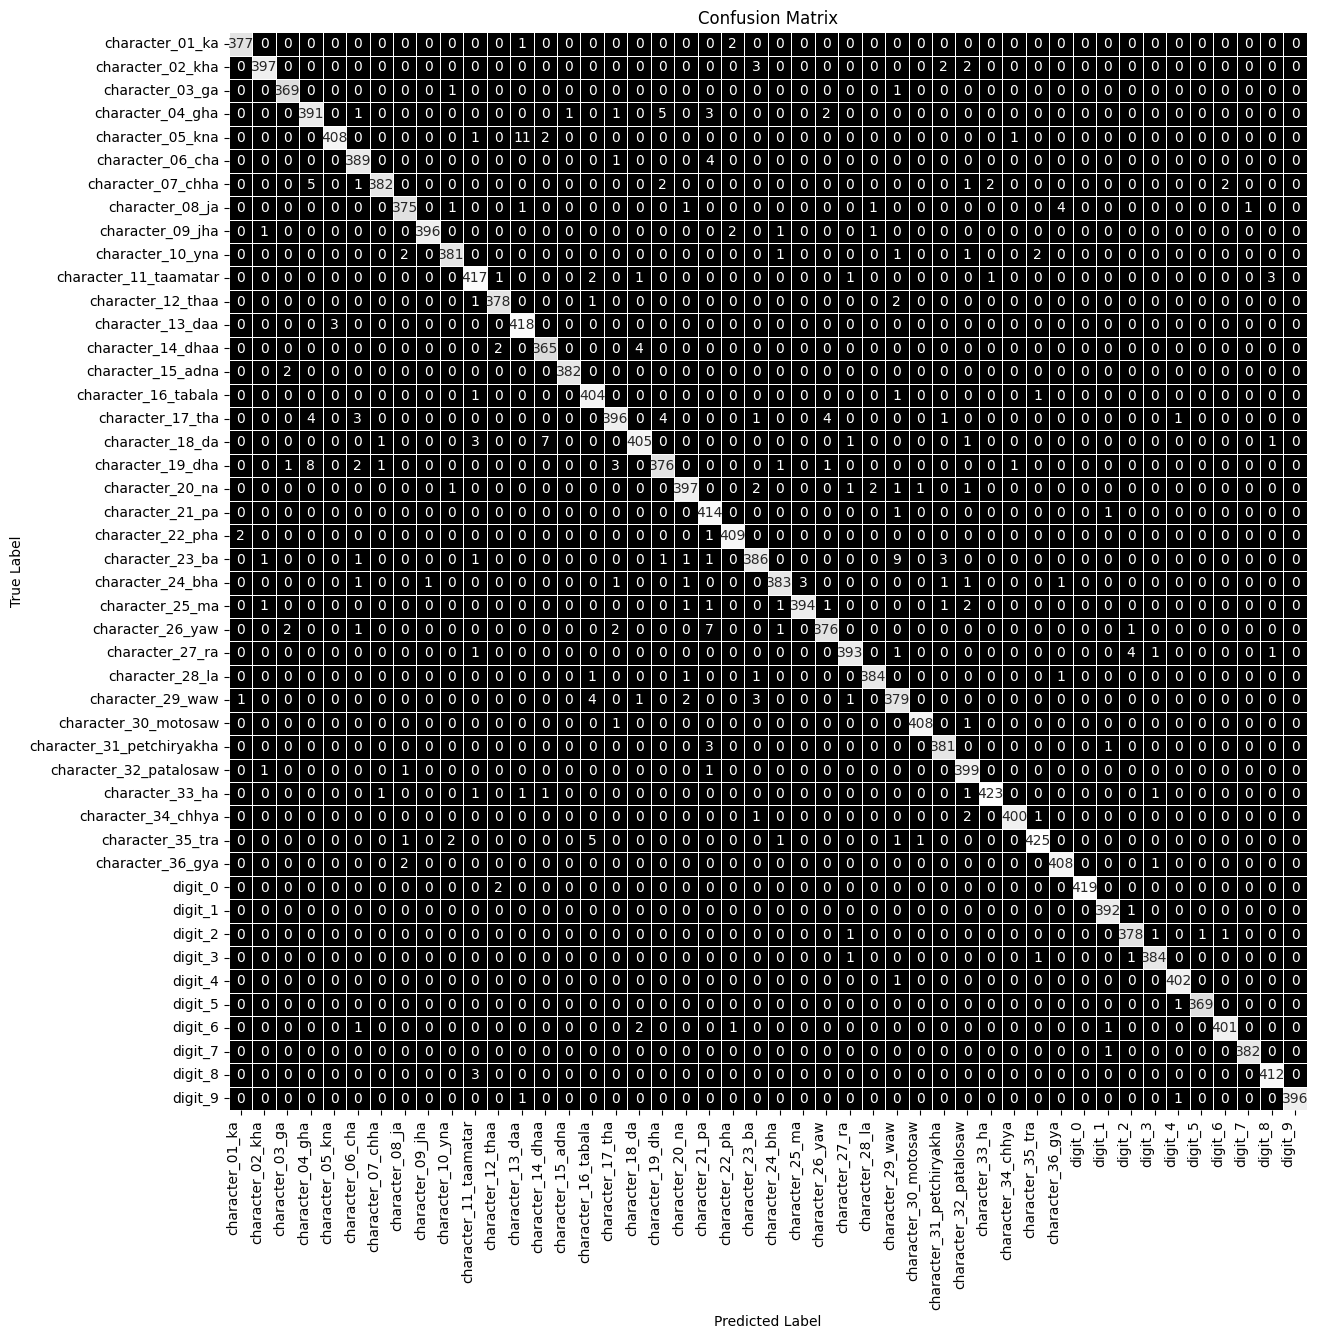

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have class_names as a list of character names
class_names = ['character_01_ka', 'character_02_kha', 'character_03_ga', 'character_04_gha', 'character_05_kna', 'character_06_cha', 'character_07_chha', 'character_08_ja', 'character_09_jha', 'character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']

# Create confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Set the color palette for the heatmap
sns.set_palette("Blues")

# Plot confusion matrix as a heatmap
plt.figure(figsize=(16, 14))  # Increase the figure size even more
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='gray', linewidths=.5, square=True, cbar = False)

# Customize labels, title, and ticks
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Manually set tick labels and positions for all classes
tick_positions = [i + 0.5 for i in range(len(class_names))]
heatmap.set_xticks(tick_positions)
heatmap.set_yticks(tick_positions)
heatmap.set_xticklabels(class_names, rotation=90, ha='right')
heatmap.set_yticklabels(class_names, rotation=0)

# Display the plot
plt.show()

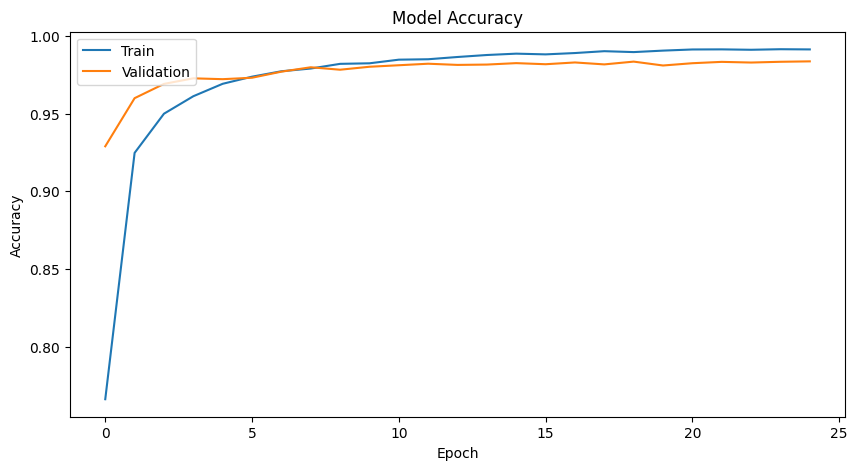

In [26]:
import pickle
import matplotlib.pyplot as plt

# Load history from file
with open('history.pkl', 'rb') as file:
    saved_history = pickle.load(file)
                                
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(False)
plt.show()

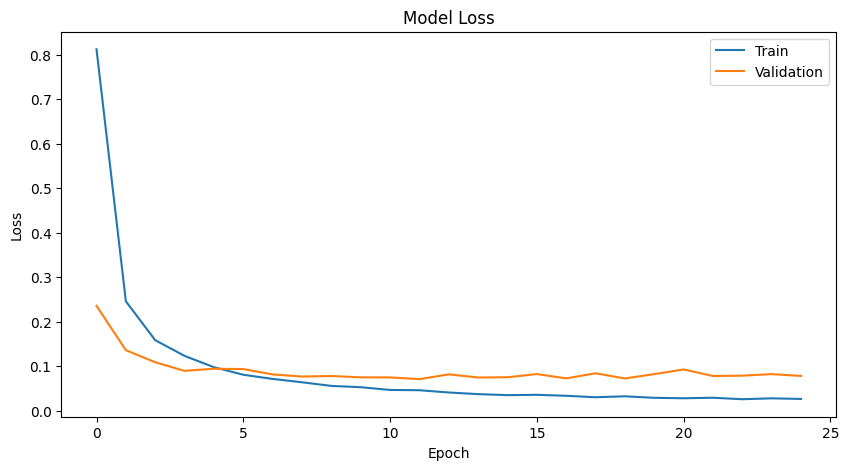

In [27]:
import pickle
import matplotlib.pyplot as plt

# Load history from file
with open('history.pkl', 'rb') as file:
    saved_history = pickle.load(file)
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(False)
plt.show()

1/1 [==============================] - 0s 90ms/step


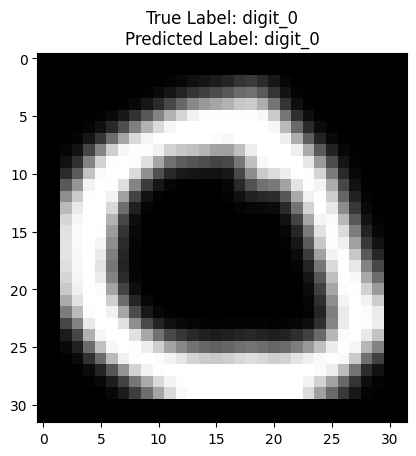

1/1 [==============================] - 0s 21ms/step


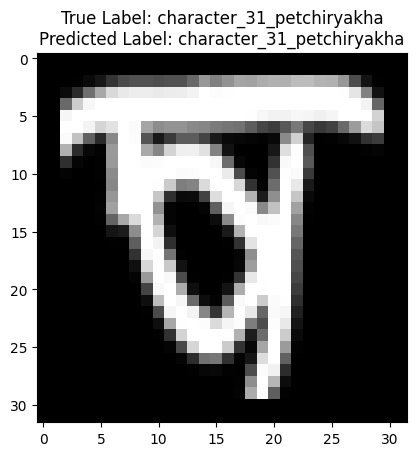

1/1 [==============================] - 0s 20ms/step


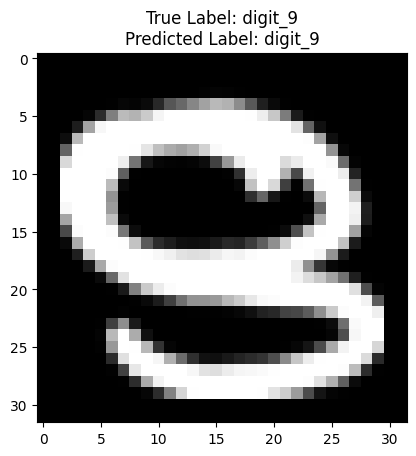

1/1 [==============================] - 0s 19ms/step


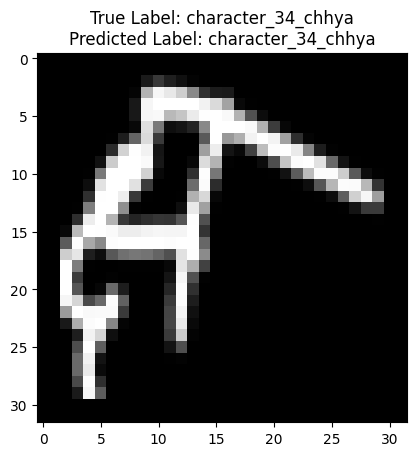

1/1 [==============================] - 0s 27ms/step


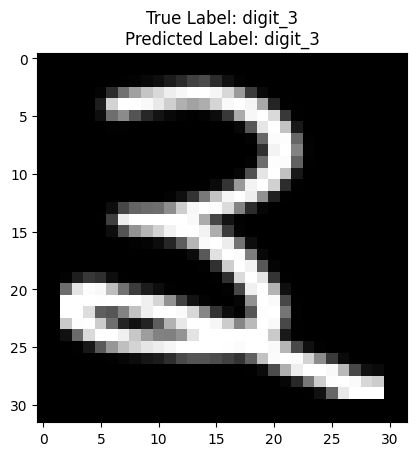

1/1 [==============================] - 0s 23ms/step


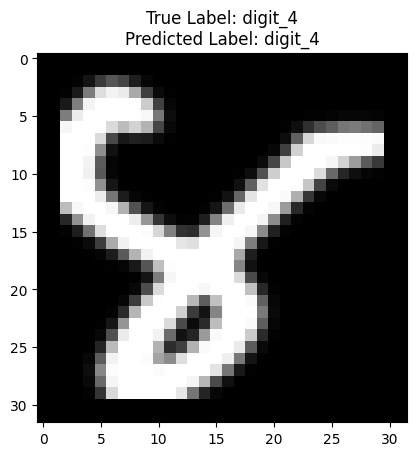

1/1 [==============================] - 0s 19ms/step


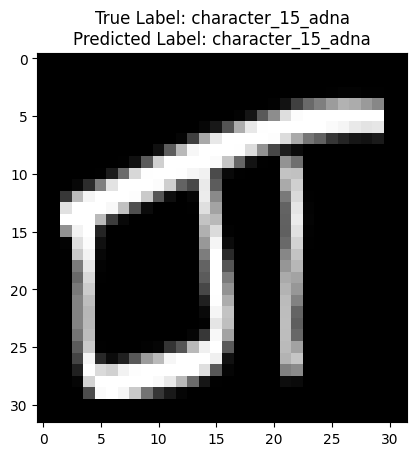

1/1 [==============================] - 0s 19ms/step


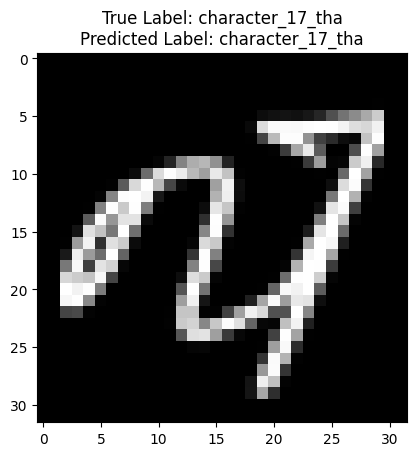

1/1 [==============================] - 0s 20ms/step


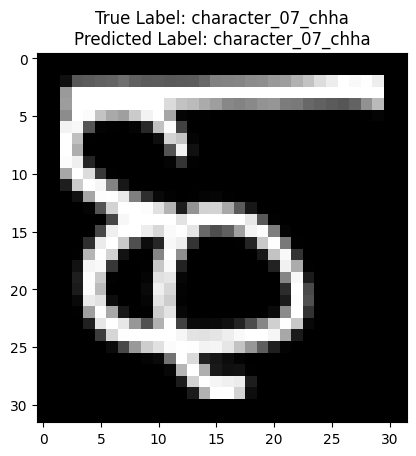

1/1 [==============================] - 0s 19ms/step


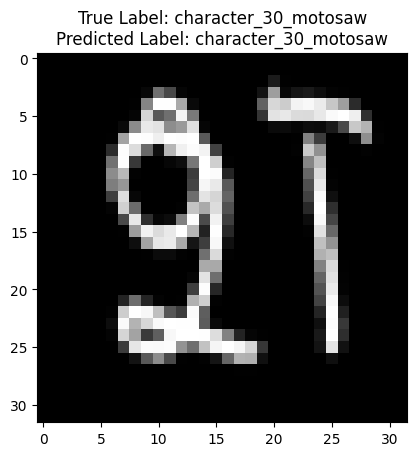

1/1 [==============================] - 0s 20ms/step


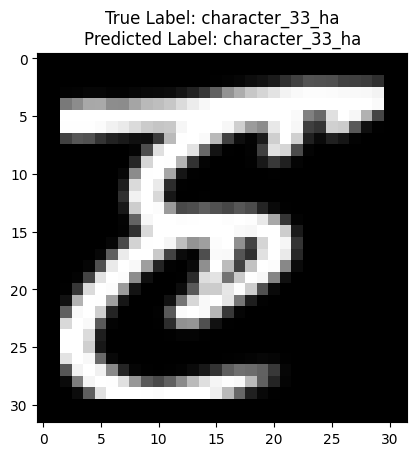

1/1 [==============================] - 0s 19ms/step


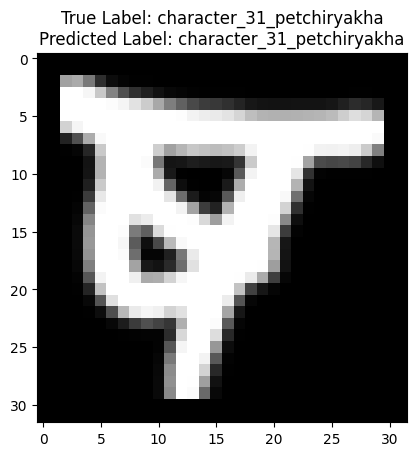

1/1 [==============================] - 0s 18ms/step


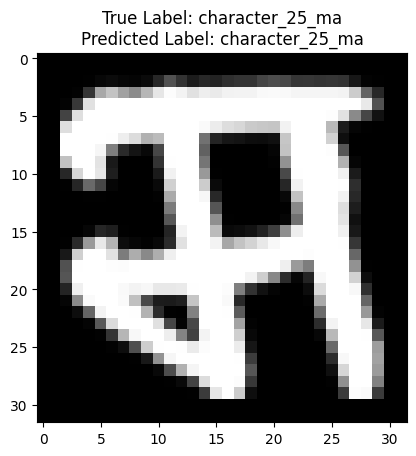

1/1 [==============================] - 0s 19ms/step


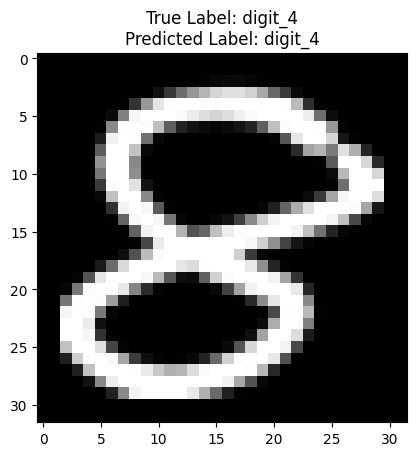

1/1 [==============================] - 0s 19ms/step


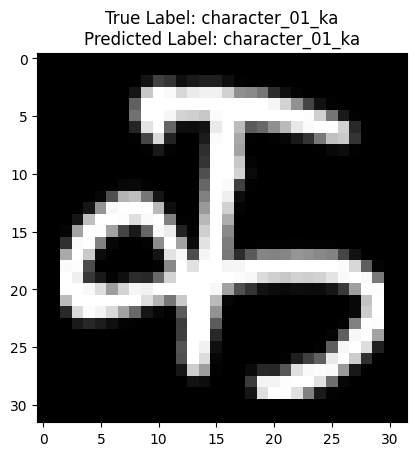

1/1 [==============================] - 0s 20ms/step


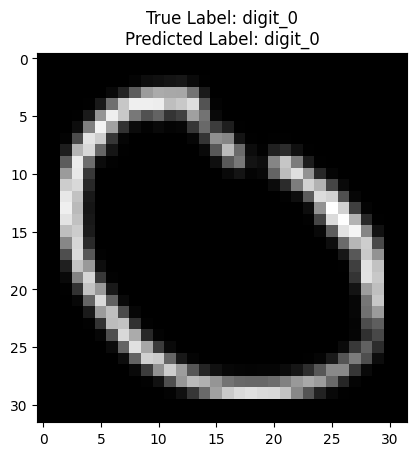

1/1 [==============================] - 0s 19ms/step


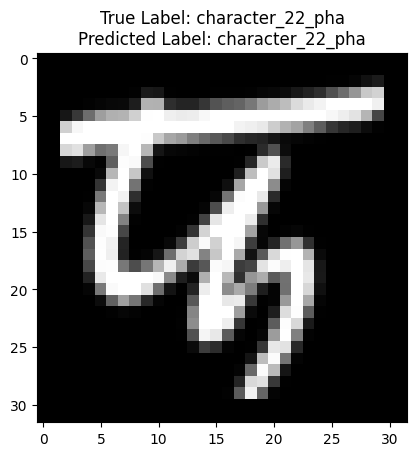

1/1 [==============================] - 0s 21ms/step


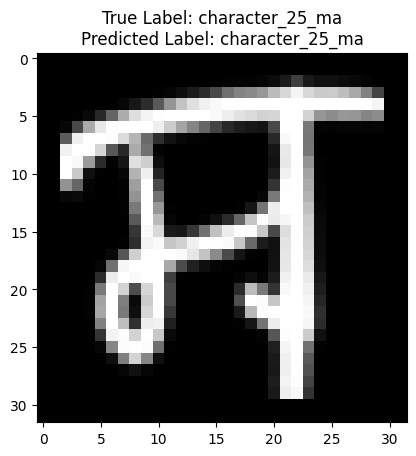

1/1 [==============================] - 0s 20ms/step


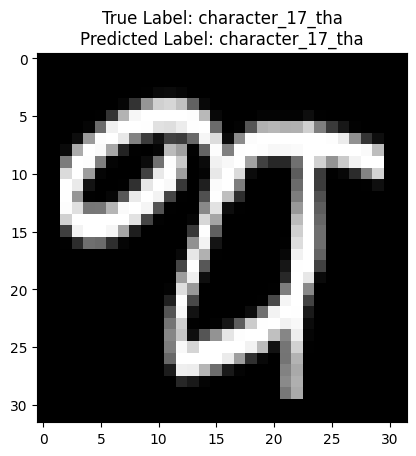

1/1 [==============================] - 0s 20ms/step


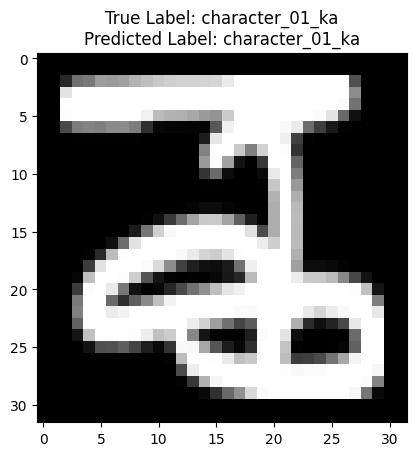

1/1 [==============================] - 0s 21ms/step


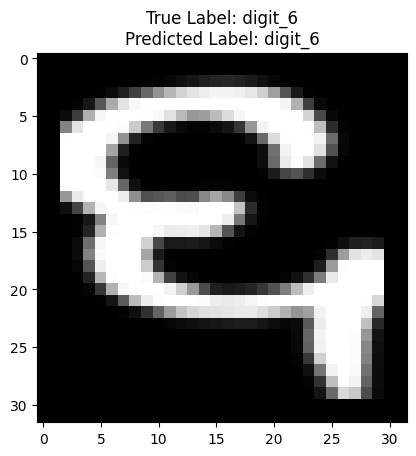

1/1 [==============================] - 0s 22ms/step


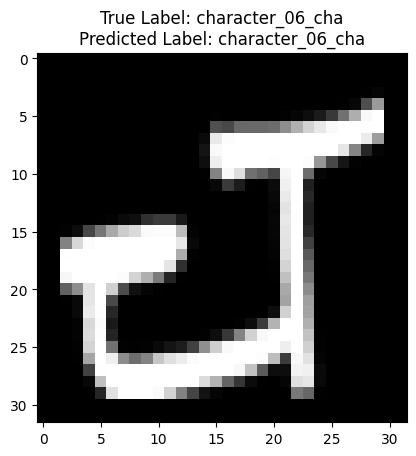

1/1 [==============================] - 0s 19ms/step


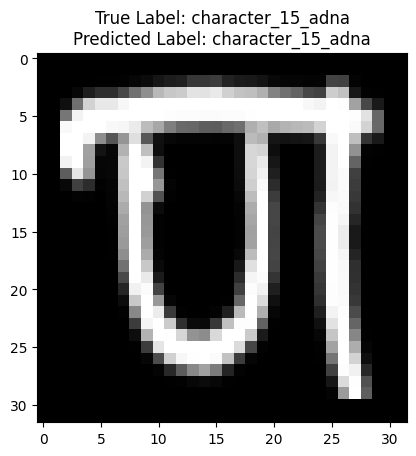

1/1 [==============================] - 0s 21ms/step


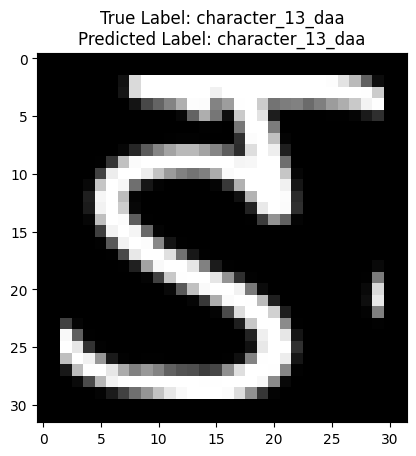

1/1 [==============================] - 0s 19ms/step


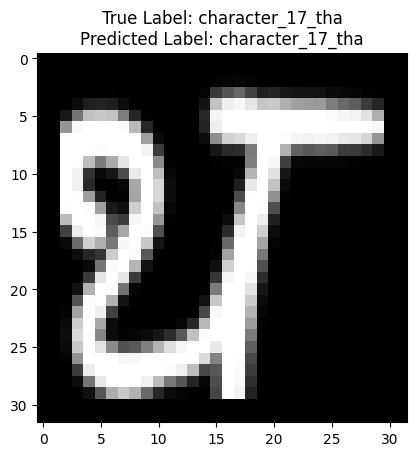

1/1 [==============================] - 0s 20ms/step


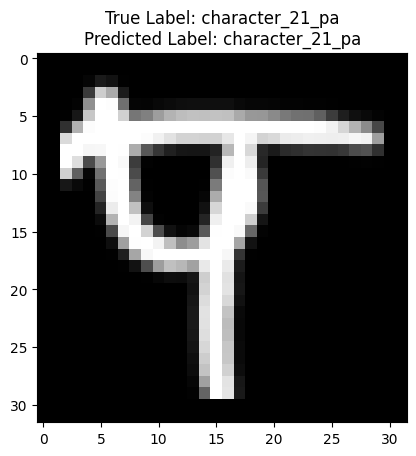

1/1 [==============================] - 0s 22ms/step


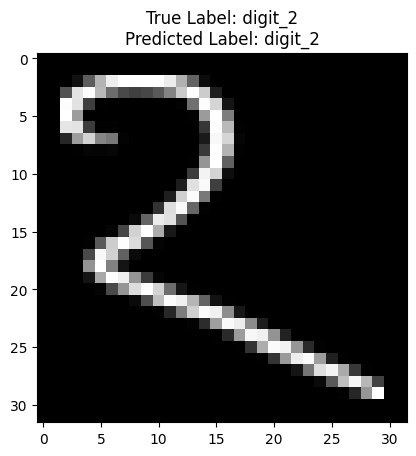

1/1 [==============================] - 0s 21ms/step


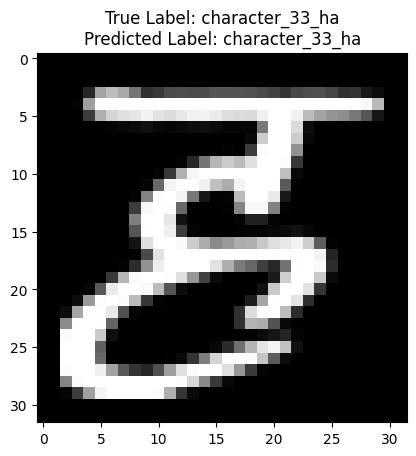

1/1 [==============================] - 0s 21ms/step


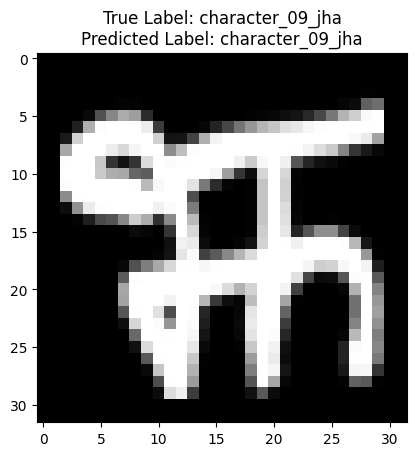

1/1 [==============================] - 0s 28ms/step


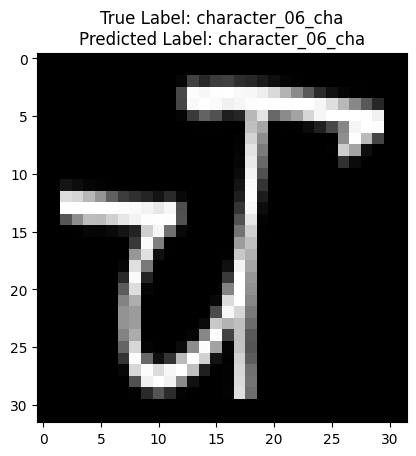

1/1 [==============================] - 0s 18ms/step


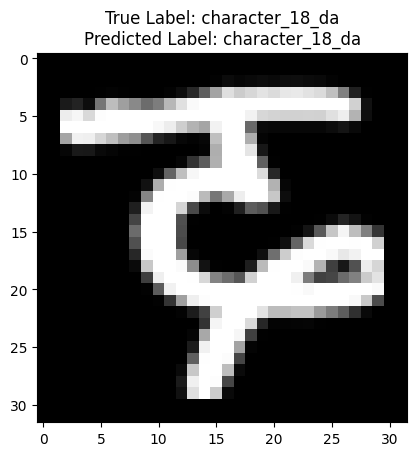

1/1 [==============================] - 0s 20ms/step


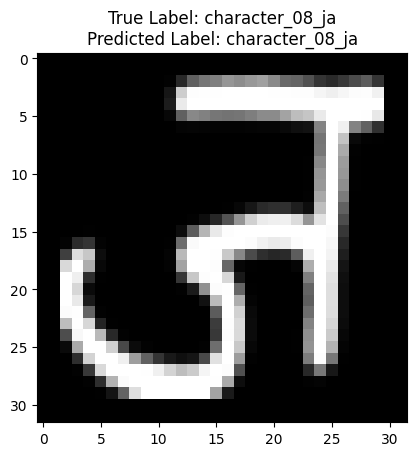

1/1 [==============================] - 0s 20ms/step


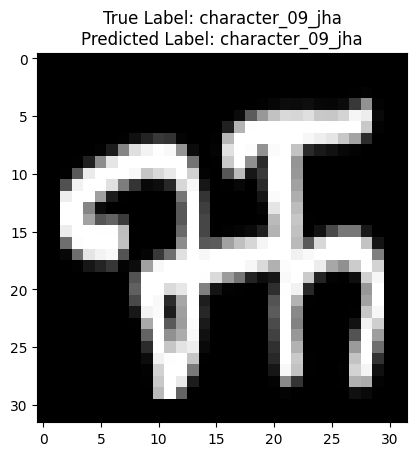

1/1 [==============================] - 0s 20ms/step


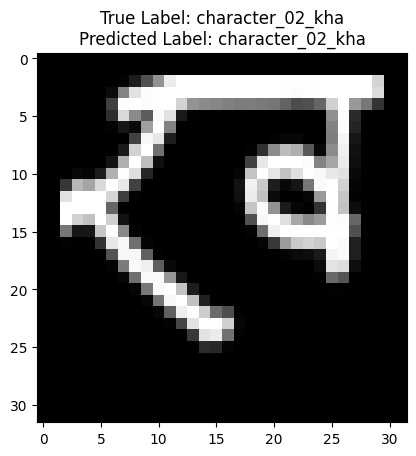

1/1 [==============================] - 0s 20ms/step


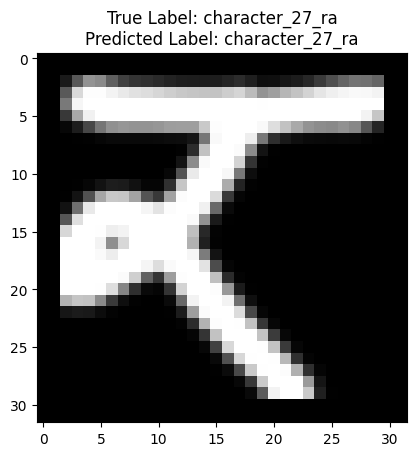

1/1 [==============================] - 0s 20ms/step


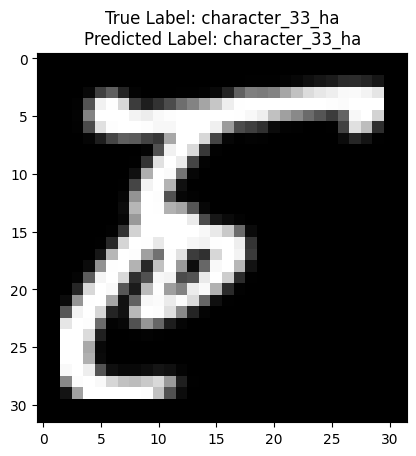

1/1 [==============================] - 0s 19ms/step


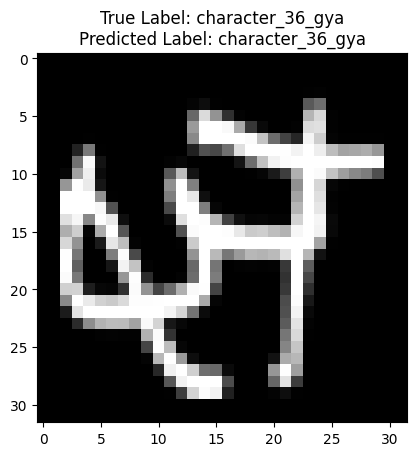

1/1 [==============================] - 0s 19ms/step


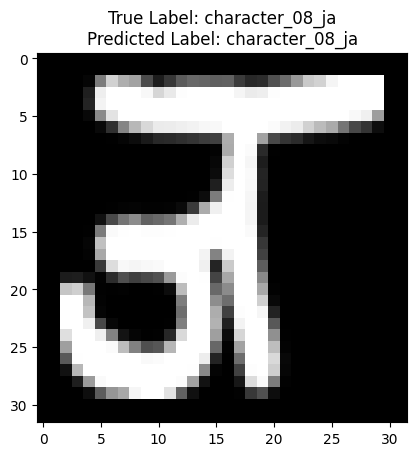

1/1 [==============================] - 0s 20ms/step


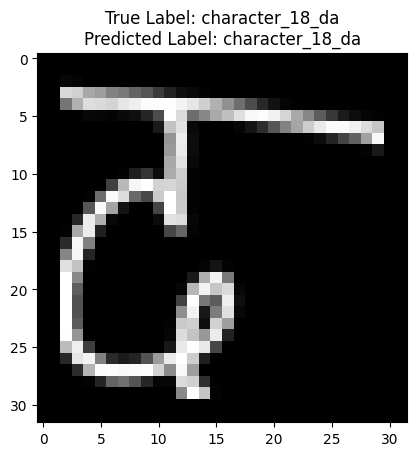

1/1 [==============================] - 0s 19ms/step


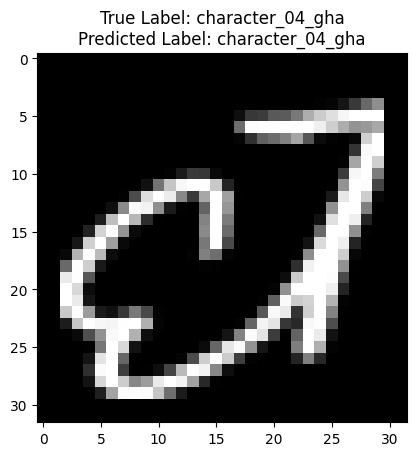

1/1 [==============================] - 0s 19ms/step


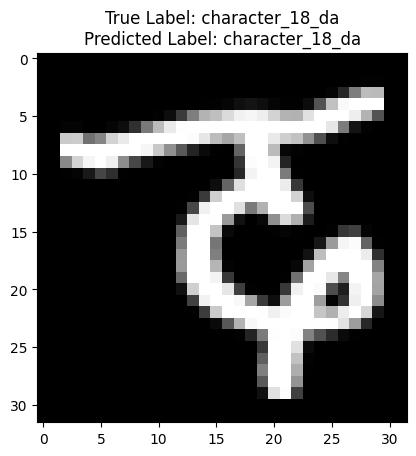

1/1 [==============================] - 0s 18ms/step


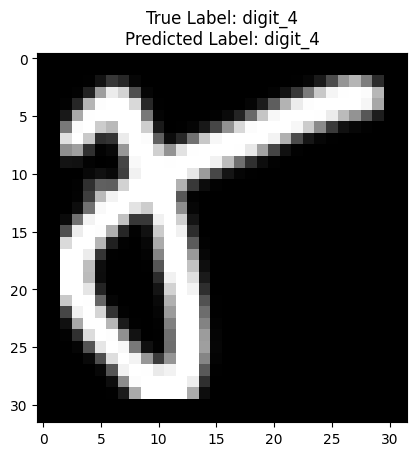

1/1 [==============================] - 0s 18ms/step


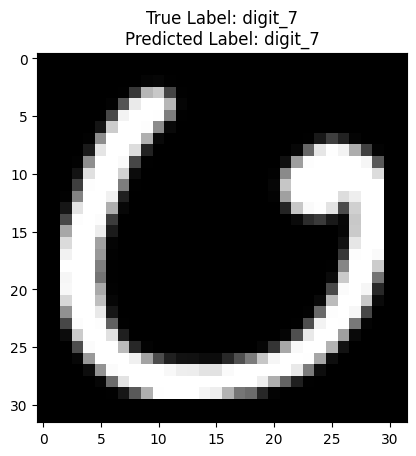

1/1 [==============================] - 0s 19ms/step


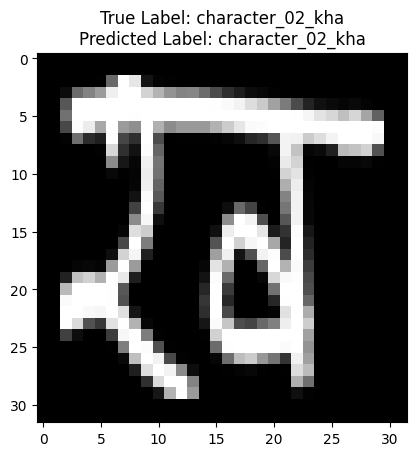

1/1 [==============================] - 0s 19ms/step


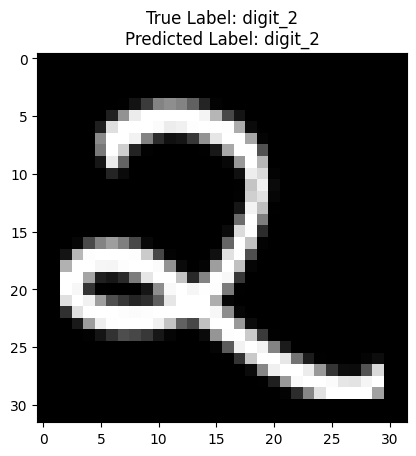

1/1 [==============================] - 0s 18ms/step


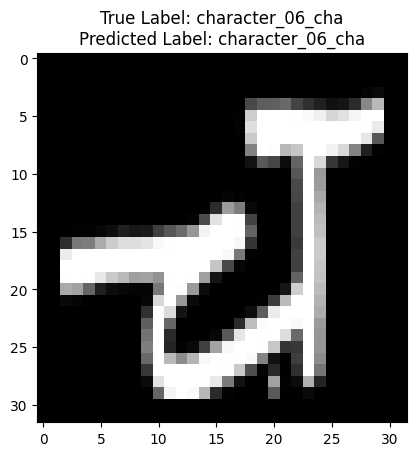

1/1 [==============================] - 0s 19ms/step


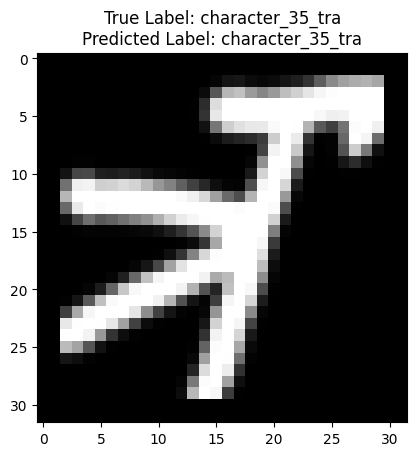

1/1 [==============================] - 0s 19ms/step


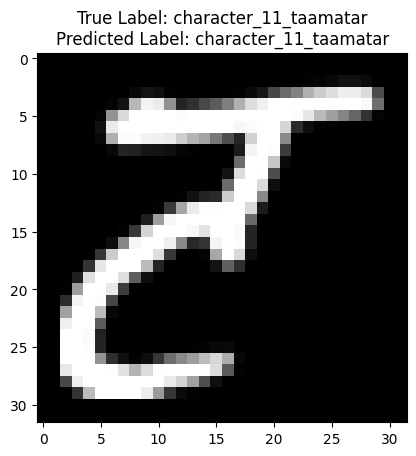

1/1 [==============================] - 0s 19ms/step


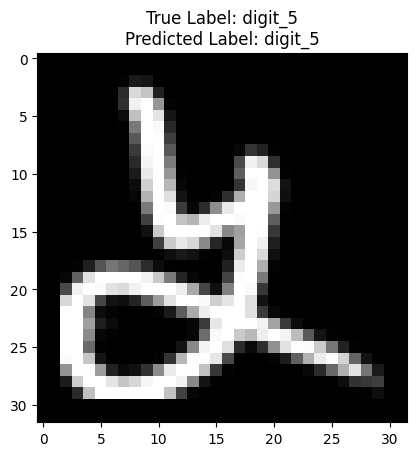

1/1 [==============================] - 0s 19ms/step


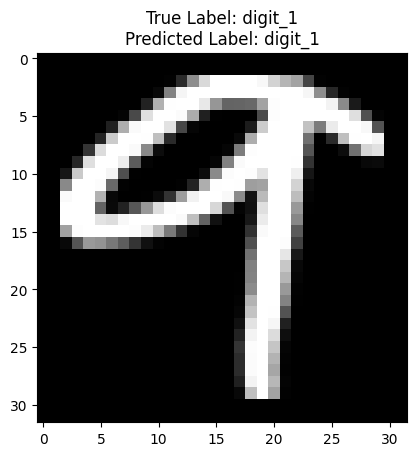

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Assuming 'X_test' is your test features and 'y_test' is your test labels
# Assuming 'class_indices' is a dictionary mapping class names to indices

# Select a few random indices from the test set
random_indices = np.random.choice(len(X_test), size=50, replace=False)

# Iterate through the selected indices
for idx in random_indices:
    # Get the input image and true label
    input_image = X_test[idx]
    true_label_index = y_test[idx]

    # Ensure true_label_index is a scalar
    true_label_index = np.argmax(true_label_index)

    # Reshape the input image if needed
    input_image = np.expand_dims(input_image, axis=0)

    # Make a prediction
    predicted_probs = model.predict(input_image)
    predicted_label_index = np.argmax(predicted_probs)

    # Map indices to class names
    true_label_name = [k for k, v in class_indices.items() if v == true_label_index][0]
    predicted_label_name = [k for k, v in class_indices.items() if v == predicted_label_index][0]

    # Display the input image along with the true and predicted labels
    plt.imshow(input_image[0, :, :, 0], cmap='gray')
    plt.title(f"True Label: {true_label_name}\nPredicted Label: {predicted_label_name}")
    plt.show()